In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=523082570d2be2f17a723719eed2e5b3760b3ad346042ed888c20e70b87c9682
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [ ]:
from deepface import DeepFace

25-06-04 04:06:05 - Directory /root/.deepface has been created
25-06-04 04:06:05 - Directory /root/.deepface/weights has been created


In [ ]:
from PIL import Image

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='suafoto.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)

 # Convert the image to RGB mode
  img = Image.open(filename).convert('RGB')
  img.save(filename)
  return filename

In [ ]:
take_photo()

<IPython.core.display.Javascript object>

'suafoto.jpg'

In [ ]:
emb = DeepFace.represent(img_path = "suafoto.jpg", model_name = 'Facenet')

25-06-04 04:06:58 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 254MB/s]


In [ ]:
len(emb)

1

In [ ]:
emb[0]

{'embedding': [-0.8430565595626831,
  -1.8265000581741333,
  -0.8105009198188782,
  -0.07132025063037872,
  0.9235556721687317,
  -1.3172883987426758,
  -0.6820060014724731,
  -0.22104640305042267,
  -0.7938833832740784,
  1.903427004814148,
  -1.0915685892105103,
  -0.5808296799659729,
  -0.2912234365940094,
  -1.8100122213363647,
  -0.37972208857536316,
  0.32029932737350464,
  0.1417093575000763,
  -0.7315348386764526,
  -0.22582119703292847,
  -2.7583389282226562,
  1.5727150440216064,
  -0.989841103553772,
  -0.8459352254867554,
  1.1882251501083374,
  -0.0037338491529226303,
  -0.667410135269165,
  1.3143733739852905,
  1.457014560699463,
  1.4706298112869263,
  2.121485471725464,
  0.07000806927680969,
  1.5618702173233032,
  -0.11329023540019989,
  -1.0346176624298096,
  -0.6404460072517395,
  -0.667654275894165,
  -0.7570216059684753,
  -0.3481963872909546,
  0.9539492726325989,
  -0.9228442907333374,
  0.4713476002216339,
  0.4158440828323364,
  0.28970080614089966,
  -0.0752

In [ ]:
len(emb[0]['embedding'])

128

In [ ]:
!pip install mlcroissant

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 14.0 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15127 sha256=6346a8941a09e28e38f186dc96c72ebbdb1cd32baab6e7cea9281f54b7287d27
  Stored in directory: /root/.cache/pip/wheels/53/cf/51/a4ea10224b7fdb523e18e2033cadf2a8657517d1f95f3f5413
Successfully built jsonpath-rw


In [ ]:
import mlcroissant as mlc
import pandas as pd

# Fetch the Croissant JSON-LD from a local file using mlc.Dataset
# Removed: croissant_dataset = pd.read_json('lfwpeople-metadata.json')
croissant_dataset = mlc.Dataset('lfwpeople-metadata.json')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Check if record_sets is not empty before accessing its elements
if record_sets:
    # Fetch the records and put them in a DataFrame
    # Access records through the croissant_dataset object
    record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
    record_set_df.head()
else:
    print("No record sets found in the dataset.")

  -  [Metadata(LFW - People (Face Recognition))] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(LFW - People (Face Recognition))] Property "https://schema.org/version" is recommended, but does not exist.


[]
No record sets found in the dataset.


In [ ]:
FRmodel=model

NameError: name 'model' is not defined

In [ ]:
import os
import numpy as np

def build_face_database(main_folder_path, model):
    database = {}

    for person_name in os.listdir(main_folder_path):
        person_folder = os.path.join(main_folder_path, person_name)

        if os.path.isdir(person_folder):
            # Normalize name format: lowercase and remove underscores
            clean_name = person_name.strip().replace("_", " ").lower()
            embeddings = []

            for img_name in os.listdir(person_folder):
                if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(person_folder, img_name)
                    emb = img_to_encoding(img_path, model)
                    embeddings.append(emb)

            if embeddings:
                avg_embedding = np.mean(embeddings, axis=0)
                database[clean_name] = avg_embedding

    return database

In [ ]:
database=build_face_database("/content/lfw-funneled", FRmodel)

NameError: name 'FRmodel' is not defined

Extracted /content/lfw-funneled.tgz to /content/lfw-funneled/

DataFrame of image paths:
                                          image_path
0  /content/lfw-funneled/lfw_funneled/Mark_Hogan/...
1  /content/lfw-funneled/lfw_funneled/Johan_Bruyn...
2  /content/lfw-funneled/lfw_funneled/Leonardo_Di...
3  /content/lfw-funneled/lfw_funneled/Leonardo_Di...
4  /content/lfw-funneled/lfw_funneled/Leonardo_Di...

Displaying the first 5 images:


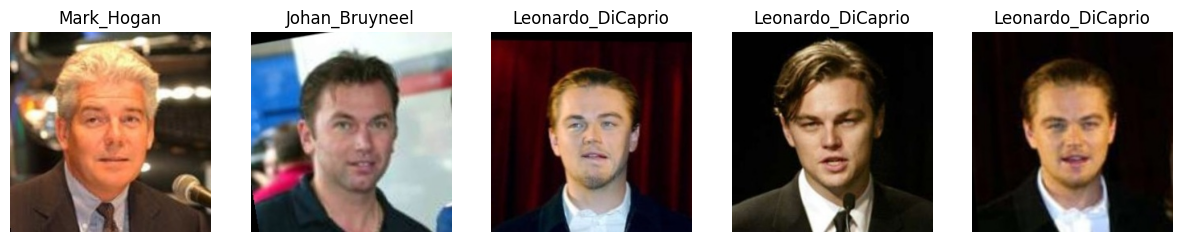

In [ ]:
# prompt: liste todos os arquivos que estao dentro do '/content/lfw-funneled.tgz' faca um codigo em pyrhon que percorre todo o diretorio e cria um dataframe com o caminho de todas as fotos. e exiba as 5 primeiras imagens utilizando o from PIL import Image
# Ex : ''' from PIL import Image
# img = Image.open("suafoto.jpg")  # Load the original image
# faces_list = []
# for face in faces:
#     x, y, w, h = face['facial_area']['x'], face['facial_area']['y'], face['facial_area']['w'], face['facial_area']['h']
#     face_patch = img.crop((x, y, x + w, y + h))
#     faces_list.append(face_patch)
# len(faces_list)
# faces_list[0]
# ''

import tarfile
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the tgz file
tgz_file_path = '/content/lfw-funneled.tgz'
extract_dir = '/content/lfw-funneled/' # Define the directory to extract to

# Ensure the extraction directory exists
os.makedirs(extract_dir, exist_ok=True)

# Extract the tgz file
try:
    with tarfile.open(tgz_file_path, 'r:gz') as tar:
        tar.extractall(path=extract_dir)
    print(f"Extracted {tgz_file_path} to {extract_dir}")
except tarfile.TarError as e:
    print(f"Error extracting {tgz_file_path}: {e}")

# List all files in the extracted directory and its subdirectories
image_paths = []
for root, _, files in os.walk(extract_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')): # Check for common image extensions
            image_paths.append(os.path.join(root, file))

# Create a DataFrame from the image paths
image_df = pd.DataFrame(image_paths, columns=['image_path'])

# Display the first few rows of the DataFrame
print("\nDataFrame of image paths:")
print(image_df.head())

# Display the first 5 images
print("\nDisplaying the first 5 images:")
plt.figure(figsize=(15, 5))
for i in range(min(5, len(image_df))):
    img_path = image_df.iloc[i]['image_path']
    try:
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(os.path.dirname(img_path))) # Display the person's name as title
        plt.axis('off')
    except FileNotFoundError:
        print(f"Image file not found: {img_path}")
    except Exception as e:
        print(f"Error opening or displaying image {img_path}: {e}")

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Nova seção

In [ ]:
print("\nFirst 5 images:")
for i in range(min(5, len(df))):
  img_path = df.iloc[i]['image_path']
  try:
    img = Image.open(img_path)
    display(img)
  except FileNotFoundError:
    print(f"Error: Image not found at {img_path}")
  except Exception as e:
    print(f"Error opening image {img_path}: {e}")


First 5 images:


In [ ]:
faces = DeepFace.extract_faces(img_path = "suafoto.jpg")

In [ ]:
from PIL import Image
img = Image.open("suafoto.jpg")  # Load the original image
faces_list = []
for face in faces:
    x, y, w, h = face['facial_area']['x'], face['facial_area']['y'], face['facial_area']['w'], face['facial_area']['h']
    face_patch = img.crop((x, y, x + w, y + h))
    faces_list.append(face_patch)

In [ ]:
len(faces_list)

1

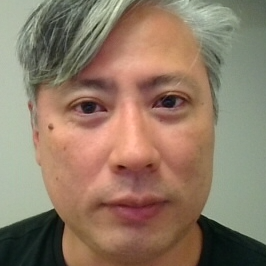

In [ ]:
faces_list[0]

In [ ]:
faces_list[1]

IndexError: list index out of range

In [ ]:
faces_list[0].save("face1.jpg")

OSError: cannot write mode RGBA as JPEG

In [ ]:
emb = DeepFace.represent(img_path = "face1.jpg", model_name = 'Facenet')

In [ ]:
len(emb[0]['embedding'])

128

In [ ]:
!pip install requests

In [ ]:
import requests

In [ ]:
api_url = "https://localhost:8000/buscar?lat=40&lon=40"
payload = {"key1": "value1", "key2": "value2"}
response = requests.post(api_url) # Use json= for sending JSON data

if response.status_code == 200:
    print("Success!")
else:
    print("Error:", response.status_code)

ConnectionError: HTTPSConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /buscar?lat=40&lon=40 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7a7842d53a50>: Failed to establish a new connection: [Errno 111] Connection refused'))